In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

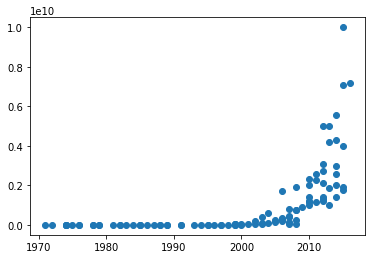

In [14]:
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')
    
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

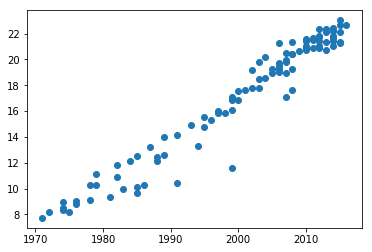

In [15]:
Y = np.log(Y)
plt.scatter(X,Y)
plt.show()

In [16]:
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

Yhat = a*X + b

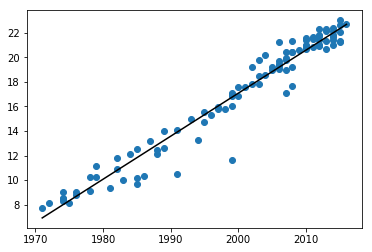

In [17]:
plt.scatter(X, Y)
plt.plot(X, Yhat, 'k')
plt.show()

In [18]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print('a:', a, 'b:', b)
print("the r-squared is:", r2)

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576


In [19]:
# how long does it take for the transitor count to double
# log(tc) = a*year + b
# tc = exp(b) * exp(a * year)
# 2*tc = 2 * exp(b) exp(a * year) = exp(ln(2)) * exp(b) * exp(a * year)
#    = exp(b) * exp(a * year + ln(2))
# exp(b)*exp(a*year2) = exp(b)*exp(a*year1 + ln2)
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print('time to double:', np.log(2)/a, 'years')

time to double: 1.9745331723797188 years
